In [1]:
import pandas as pd
import numpy as np
import os
import json
import altair as alt

In [2]:
JSON_FILE = os.path.join("H:\\", "AOC-REM2", "results", "mammalian_REM2", "mammalian_REM2_codons.SA.fasta.BGM.json")
posteriorThreshold = 0.5

In [3]:
def getBGMData(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["MLE"]["content"]
#end method

def getBGMHeaders(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["MLE"]["headers"]
#end method

def getBGMInput(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["input"]
#end method

In [4]:
columns = getBGMHeaders(JSON_FILE)
headers = [x[0] for x in columns]

# For FUBAR
#headers.append("Z")
#headers.append("Y")
#headers

headers2= []
for item in headers:
    item = item.replace('â€“', "-")
    headers2.append(item)
headers2

['Site 1',
 'Site 2',
 'P [Site 1 -> Site 2]',
 'P [Site 2 -> Site 1]',
 'P [Site 1 <-> Site 2]',
 'Site 1 subs',
 'Site 2 subs',
 'Shared subs']

### Selected Sites

In [5]:
df = pd.DataFrame(getBGMData(JSON_FILE), columns=headers2, dtype = float)
#df.drop('Z', axis=1, inplace=True)
#df.drop('Y', axis=1, inplace=True)

#df["omega"] = df["beta"] / df["alpha"]

df.index += 1
#df["Site"] = df.index

df

,Site 1,Site 2,P [Site 1 -> Site 2],P [Site 2 -> Site 1],P [Site 1 <-> Site 2],Site 1 subs,Site 2 subs,Shared subs
1,1.0,2.0,0.000019,0.001410,0.001430,1.0,3.0,0.0
2,1.0,7.0,0.005954,0.004911,0.010865,1.0,11.0,1.0
3,1.0,8.0,0.019093,0.027105,0.046199,1.0,5.0,1.0
4,1.0,9.0,0.007977,0.002020,0.009997,1.0,15.0,1.0
5,1.0,11.0,0.250330,0.233474,0.483804,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
59681,653.0,655.0,0.030221,0.000674,0.030894,2.0,2.0,1.0
59682,653.0,656.0,0.303996,0.153036,0.457032,2.0,3.0,2.0
59683,654.0,655.0,0.000296,0.000343,0.000639,17.0,2.0,1.0
59684,654.0,656.0,0.021829,0.314010,0.335839,17.0,3.0,3.0


## Coevolving sites

In [6]:
coevolving_sites_1 = df[df["P [Site 1 -> Site 2]"] >= posteriorThreshold]
coevolving_sites_2 = df[df["P [Site 2 -> Site 1]"] >= posteriorThreshold]
coevolving_sites_3 = df[df["P [Site 1 <-> Site 2]"] >= posteriorThreshold]

In [7]:
coevolving_sites_1

,Site 1,Site 2,P [Site 1 -> Site 2],P [Site 2 -> Site 1],P [Site 1 <-> Site 2],Site 1 subs,Site 2 subs,Shared subs
3406,17.0,18.0,0.557708,0.087005,0.644713,2.0,3.0,2.0
3411,17.0,23.0,0.520519,0.081689,0.602207,2.0,3.0,2.0
8275,32.0,581.0,0.511905,0.083593,0.595498,23.0,17.0,7.0
8719,34.0,147.0,0.825838,0.003061,0.828899,12.0,14.0,5.0
12102,61.0,65.0,0.889992,0.109999,0.999991,11.0,12.0,8.0
20077,93.0,116.0,0.835578,0.094093,0.929671,6.0,5.0,3.0
20296,93.0,585.0,0.838737,0.100695,0.939431,6.0,10.0,4.0
20406,94.0,180.0,0.569722,0.310674,0.880396,18.0,5.0,4.0
20643,95.0,130.0,0.577444,0.416221,0.993665,20.0,15.0,8.0
39387,222.0,225.0,0.756924,0.068834,0.825757,3.0,2.0,2.0


In [8]:
coevolving_sites_2

,Site 1,Site 2,P [Site 1 -> Site 2],P [Site 2 -> Site 1],P [Site 1 <-> Site 2],Site 1 subs,Site 2 subs,Shared subs
354,2.0,17.0,0.072422,0.501652,0.574074,3.0,2.0,2.0
8974,35.0,61.0,0.013892,0.679082,0.692973,13.0,11.0,5.0
15842,75.0,265.0,0.156149,0.563267,0.719416,6.0,2.0,2.0
25064,128.0,313.0,0.121265,0.700397,0.821662,7.0,2.0,2.0
27117,136.0,265.0,0.054046,0.684799,0.738845,7.0,2.0,2.0
29501,146.0,585.0,0.067635,0.829580,0.897216,12.0,10.0,5.0
37539,213.0,222.0,0.064557,0.799037,0.863594,2.0,3.0,2.0
44641,308.0,315.0,0.176546,0.613028,0.789575,4.0,2.0,2.0
44808,309.0,310.0,0.375716,0.586908,0.962624,12.0,5.0,4.0
47767,333.0,354.0,0.440586,0.540737,0.981323,3.0,3.0,3.0


In [9]:
coevolving_sites_3

,Site 1,Site 2,P [Site 1 -> Site 2],P [Site 2 -> Site 1],P [Site 1 <-> Site 2],Site 1 subs,Site 2 subs,Shared subs
354,2.0,17.0,0.072422,0.501652,0.574074,3.0,2.0,2.0
3120,16.0,87.0,0.247714,0.255948,0.503662,12.0,19.0,5.0
3406,17.0,18.0,0.557708,0.087005,0.644713,2.0,3.0,2.0
3410,17.0,22.0,0.335242,0.223150,0.558393,2.0,3.0,2.0
3411,17.0,23.0,0.520519,0.081689,0.602207,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...
59435,629.0,632.0,0.647263,0.002544,0.649807,4.0,3.0,3.0
59569,636.0,644.0,0.032808,0.793784,0.826592,5.0,3.0,3.0
59608,643.0,644.0,0.005635,0.789881,0.795516,6.0,3.0,3.0
59670,649.0,656.0,0.131944,0.776366,0.908311,7.0,3.0,3.0


In [270]:
#coevolving_sites_3.to_csv("../tables/BDNF/BDNF_BGM_Table.csv", index=False)

coevolving_sites_3.to_csv( os.path.join("..", "results", "mammalian_REM2", "mammalian_REM2_BGM_Results.csv"), index=False)

## Visualizations

In [13]:
# Basic plot
coevolving_sites_3["ProbS1andS2"] = coevolving_sites_3["P [Site 1 <-> Site 2]"]

source = coevolving_sites_3

line = alt.Chart(source).mark_circle().encode(
    x ='Site 1',
    y ='Site 2',
    size = "Shared subs",
    color=alt.Color('ProbS1andS2', scale=alt.Scale(scheme='reds', reverse=False))
).properties(
    width=800,
    height=600)

line

<ipython-input-13-6166bfc09696>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coevolving_sites_3["ProbS1andS2"] = coevolving_sites_3["P [Site 1 <-> Site 2]"]


alt.Chart(...)

## Figure legend.

In [15]:
## Summary

a = getBGMInput(JSON_FILE)["number of sites"]
b = len(coevolving_sites_3["Site 1"])

print("BGM analysis of your gene of interest found " + str(b) + " pairs of coevolving sites out of " + str(a) + " total sites to be statistically significant (posterior probability threshold " + str(posteriorThreshold) + ")." )


BGM analysis of your gene of interest found 66 pairs of coevolving sites out of 656 total sites to be statistically significant (posterior probability threshold 0.5).


# Network analysis

In [250]:
%matplotlib inline
import numpy as np
import networkx as nx
import altair as alt
import nx_altair as nxa

In [256]:
df4 = coevolving_sites_3[["Site 1", "Site 2", "Shared subs", "ProbS1andS2"]]
df4 = df4.rename(columns={"Site 1": "From", 
                          "Site 2": "To",
                          "Shared subs": "Weight"})
df4

,From,To,Weight,ProbS1andS2
354,2.0,17.0,2.0,0.574074
3120,16.0,87.0,5.0,0.503662
3406,17.0,18.0,2.0,0.644713
3410,17.0,22.0,2.0,0.558393
3411,17.0,23.0,2.0,0.602207
...,...,...,...,...
59435,629.0,632.0,3.0,0.649807
59569,636.0,644.0,3.0,0.826592
59608,643.0,644.0,3.0,0.795516
59670,649.0,656.0,3.0,0.908311


In [264]:
df4 = df4.astype({"From":"int"})
df4 = df4.astype({"To":"int"})
df4 = df4.astype({"Weight":"int"})
df4.dtypes
df4

,From,To,Weight,ProbS1andS2
354,2,17,2,0.574074
3120,16,87,5,0.503662
3406,17,18,2,0.644713
3410,17,22,2,0.558393
3411,17,23,2,0.602207
...,...,...,...,...
59435,629,632,3,0.649807
59569,636,644,3,0.826592
59608,643,644,3,0.795516
59670,649,656,3,0.908311


# Go with this one

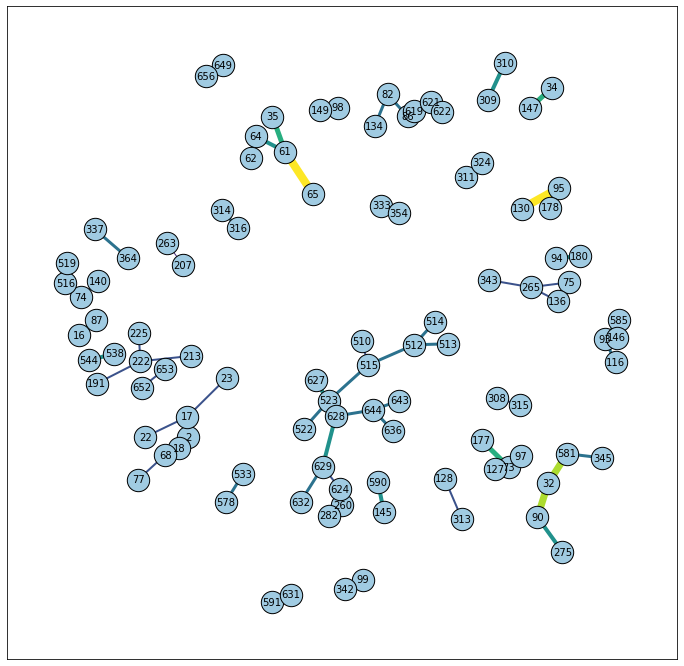

In [269]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

# Compute positions for viz.
#pos = nx.spring_layout(G)

pos = nx.spring_layout(G, k=0.10, iterations=20, seed=63)

#viz = nx.draw_networkx(G, 
#                       pos, 
#                       with_labels=True, node_size=300,font_size=10)

# Show it as an interactive plot!
plt.figure(1, figsize=(12,12)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]


nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=500,
                 font_size=10,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2",
                 edge_color=edge_colors,
                 edge_cmap=plt.cm.viridis,
                 edge_vmin=0, edge_vmax=np.max(edge_colors))

#labels = nx.get_edge_attributes(G,'Weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

#nx.draw_networkx_nodes(G, pos=pos)
#nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis, edge_vmin=0, edge_vmax=np.max(edge_colors), width=5)
#nx.draw_networkx_labels(G, pos=pos);

plt.show()

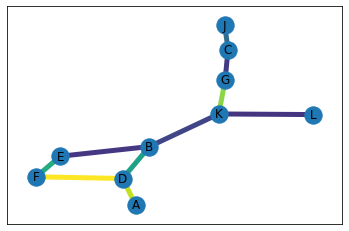

In [193]:
import networkx as nx

# dummy data, Graph and positions
df = pd.DataFrame({
    'node1': np.random.choice([*'ABCDEFGHIJKL'], 10, replace=True),
    'node2': np.random.choice([*'ABCDEFGHIJKL'], 10, replace=True),
    'Capacity': np.random.rand(10)
})



G = nx.from_pandas_edgelist(df, source='node1', target='node2', edge_attr='Capacity')
pos = nx.spring_layout(G)

# extract the edge weight
edge_colors = [a['Capacity'] for u,v,a in G.edges(data=True)]

# draw nodes and edges separately. allows using colormap for edges.
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis, edge_vmin=0, edge_vmax=np.max(edge_colors), width=5)
nx.draw_networkx_labels(G, pos=pos);

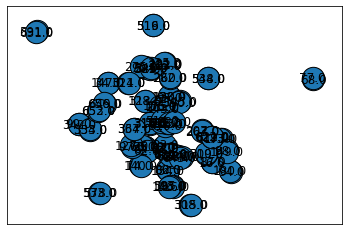

In [201]:
G = nx.from_pandas_edgelist(df3, source='Site 1', target='Site 2', edge_attr='Shared subs')

pos = nx.spring_layout(G)
#pos = nx.circular_layout(G)
pos = nx.spring_layout(G, 0.01, iterations=20)

# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k=0.1 and iterations=50

# extract the edge weight
edge_colors = [a['Shared subs'] for u,v,a in G.edges(data=True)]

# draw nodes and edges separately. allows using colormap for edges.
nx.draw_networkx_nodes(G, pos=pos)

nx.draw_networkx_edges(G, pos=pos, 
                       edge_color="black", 
                       width=0.5)

nx.draw_networkx(G, 
                        pos=pos,
                        node_size=500,
                        width=3,
                        edge_color="black",
                        edgecolors='black')

#viz